## Extracción de deatos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df_closest_rios = pd.read_csv('BBDD/df_closest_rios.csv')
df_closest_albufera = pd.read_csv('BBDD/df_closest_albufera.csv')
df_closest_embalses = pd.read_csv('BBDD/df_closest_embalses.csv')
df_rios_canales = pd.read_csv('BBDD/df_rios_canales.csv')
df_embalses_cedex = pd.read_csv('BBDD/df_embalses_cedex.csv')
df_albufera = pd.read_csv('BBDD/df_albufera.csv')

In [5]:
df_rios_canales['date'] = pd.to_datetime(df_rios_canales['date'])
df_embalses_cedex['date'] = pd.to_datetime(df_embalses_cedex['date'])
df_embalses_cedex = df_embalses_cedex.replace(0, pd.NA).dropna()
df_albufera['date'] = pd.to_datetime(df_albufera['date'])

In [6]:
df_merge_riosCanales = pd.merge(df_closest_rios[['pixel_copernicus', 'id_station']], df_rios_canales, on='id_station', how = 'inner')
df_merge_embalses = pd.merge(df_closest_embalses[['pixel_copernicus', 'id_station']], df_embalses_cedex, on='id_station', how = 'inner')
df_merge_albufera = pd.merge(df_closest_albufera[['pixel_copernicus', 'id_station']], df_albufera, on='id_station', how = 'inner')

df_merge_riosCanales = df_merge_riosCanales.rename(columns = {'quantity_hm3': 'quantity_hm3_riosCanales'})
df_merge_embalses = df_merge_embalses.rename(columns = {'quantity_hm3': 'quantity_hm3_embalses'})
df_merge_albufera = df_merge_albufera.rename(columns = {'quantity_hm3': 'quantity_hm3_albufera'})

df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].str.replace(',', '.')
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].astype('float')

df_merge = pd.merge(df_merge_riosCanales[['pixel_copernicus','date','quantity_hm3_riosCanales']],df_merge_embalses[['pixel_copernicus','date','quantity_hm3_embalses']], on =['date','pixel_copernicus'], how = 'outer' )

df_merge['quantity_hm3_riosCanales'] = df_merge['quantity_hm3_riosCanales'].fillna(0)
df_merge['quantity_hm3_embalses'] = df_merge['quantity_hm3_embalses'].fillna(0)

df_merge = df_merge.groupby(by = ['pixel_copernicus','date']).sum()

df_merge = pd.merge(df_merge, df_merge_albufera[['pixel_copernicus','date','quantity_hm3_albufera']], on =['date','pixel_copernicus'], how = 'outer')

df_merge['quantity_hm3_albufera'] = df_merge['quantity_hm3_albufera'].fillna(0)

df_merge = df_merge.groupby(by = ['pixel_copernicus','date']).sum()

df_merge['total_quantity_hm3'] = df_merge['quantity_hm3_riosCanales'] + df_merge['quantity_hm3_embalses']+ df_merge['quantity_hm3_albufera']

df_quantity = df_merge.groupby(by = ['date']).sum()

df_quantity = df_quantity.reset_index()

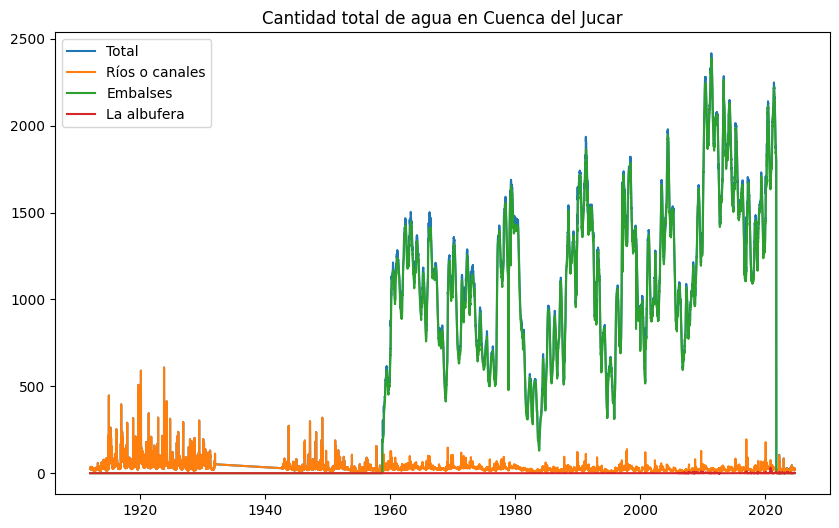

In [34]:
plt.figure(figsize=(10, 6))  
plt.title('Cantidad total de agua en Cuenca del Jucar')
plt.plot(df_quantity['date'],df_quantity['total_quantity_hm3'], label = 'Total')
plt.plot(df_quantity['date'],df_quantity['quantity_hm3_riosCanales'], label = 'Ríos o canales')
plt.plot(df_quantity['date'],df_quantity['quantity_hm3_embalses'], label = 'Embalses')
plt.plot(df_quantity['date'],df_quantity['quantity_hm3_albufera'], label = 'La albufera')
plt.legend()
plt.show()

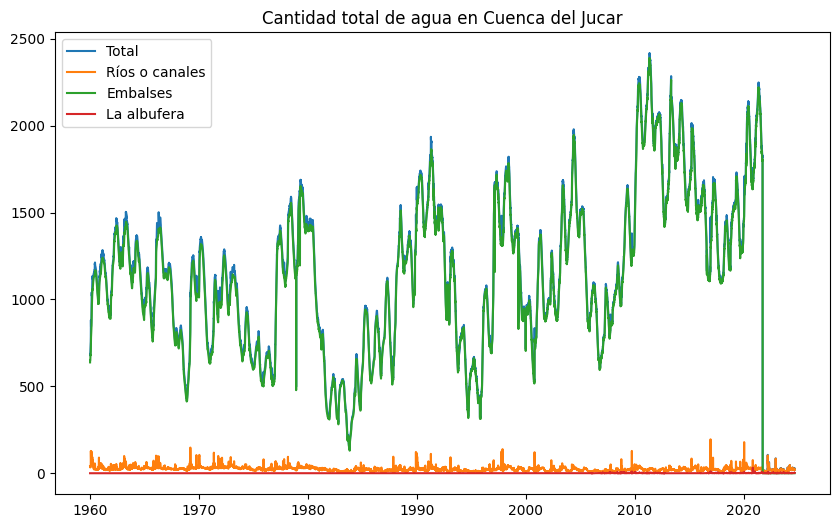

In [36]:
plt.figure(figsize=(10, 6))  
plt.title('Cantidad total de agua en Cuenca del Jucar')
df_quantity_filtered = df_quantity[df_quantity['date'].dt.year >= 1960]
plt.plot(df_quantity_filtered['date'],df_quantity_filtered['total_quantity_hm3'], label = 'Total')
plt.plot(df_quantity_filtered['date'],df_quantity_filtered['quantity_hm3_riosCanales'], label = 'Ríos o canales')
plt.plot(df_quantity_filtered['date'],df_quantity_filtered['quantity_hm3_embalses'], label = 'Embalses')
plt.plot(df_quantity_filtered['date'],df_quantity_filtered['quantity_hm3_albufera'], label = 'La albufera')
plt.legend()
plt.show()

Proporción de agua "generada" total de Ríos o canales: 2.0693221310395433 %
Proporción de agua "generada" total de Embalses: 97.9097841247296 %
Proporción de agua "generada" total de la Albufera: 0.020893744230839624 %


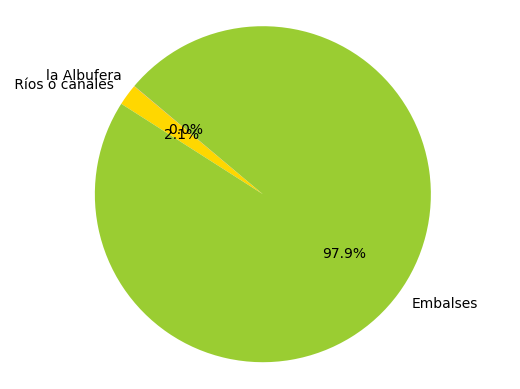

In [40]:
total_Agua_historico = df_quantity_filtered['total_quantity_hm3'].sum()
total_Agua_historico_rios = df_quantity_filtered['quantity_hm3_riosCanales'].sum()
total_Agua_historico_embalses = df_quantity_filtered['quantity_hm3_embalses'].sum()
total_Agua_historico_albufera = df_quantity_filtered['quantity_hm3_albufera'].sum()
proporcionRios = total_Agua_historico_rios / total_Agua_historico
proporcionEmbalses = total_Agua_historico_embalses / total_Agua_historico
proporcionAlbufera = total_Agua_historico_albufera / total_Agua_historico
print('Proporción de agua "generada" total de Ríos o canales:', proporcionRios*100, '%')
print('Proporción de agua "generada" total de Embalses:', proporcionEmbalses*100, '%')
print('Proporción de agua "generada" total de la Albufera:', proporcionAlbufera*100, '%')
labels = [' Ríos o canales', 'Embalses', 'la Albufera']  
sizes = [proporcionRios, proporcionEmbalses, proporcionAlbufera]  
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

In [262]:
df_quantitytotal_pixel = df_merge.groupby(by = ['pixel_copernicus']).sum()

In [267]:
df_quantitytotal_pixel[df_quantitytotal_pixel['quantity_hm3_embalses'] == 0]

,quantity_hm3_riosCanales,quantity_hm3_embalses,quantity_hm3_albufera,total_quantity_hm3
pixel_copernicus,,,,
18,615.910522,0.0,0.000000,615.910522
19,318.922272,0.0,0.000000,318.922272
24,1021.437389,0.0,0.000000,1021.437389
30,928.302941,0.0,0.000000,928.302941
31,355.501440,0.0,0.000000,355.501440
32,418.400726,0.0,0.000000,418.400726
33,1460.414794,0.0,0.000000,1460.414794
36,464.037725,0.0,0.000000,464.037725
37,1014.528499,0.0,0.000000,1014.528499


In [270]:
print('El',
      len(df_quantitytotal_pixel[df_quantitytotal_pixel['quantity_hm3_embalses'] == 0])/len(df_quantitytotal_pixel)*100,
      '% de los píxeles de copernicus más cercanos a cada estación hidrográfica de la cuenca están vinculados solamente a ríos y canales\n mientras que el',
      (1 -len(df_quantitytotal_pixel[df_quantitytotal_pixel['quantity_hm3_embalses'] == 0])/len(df_quantitytotal_pixel))*100, 
      '% restante a embalses')

El 61.29032258064516 % de los píxeles de copernicus más cercanos a cada estación hidrográfica de la cuenca están vinculados solamente a ríos y canales
 mientras que el 38.70967741935484 % restante a embalses


### Embalses

In [263]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_closest_embalses = pd.read_csv('BBDD/df_closest_embalses.csv')
df_embalses_cedex = pd.read_csv('BBDD/df_embalses_cedex.csv')
df_merge_embalses = pd.merge(df_closest_embalses[['pixel_copernicus', 'id_station']], df_embalses_cedex, on='id_station', how = 'inner')
df_merge_embalses = df_merge_embalses.rename(columns = {'quantity_hm3': 'quantity_hm3_embalses'})
df_merge_embalses['date'] = pd.to_datetime(df_merge_embalses['date'])
df_merge_embalses.set_index('date', inplace=True)

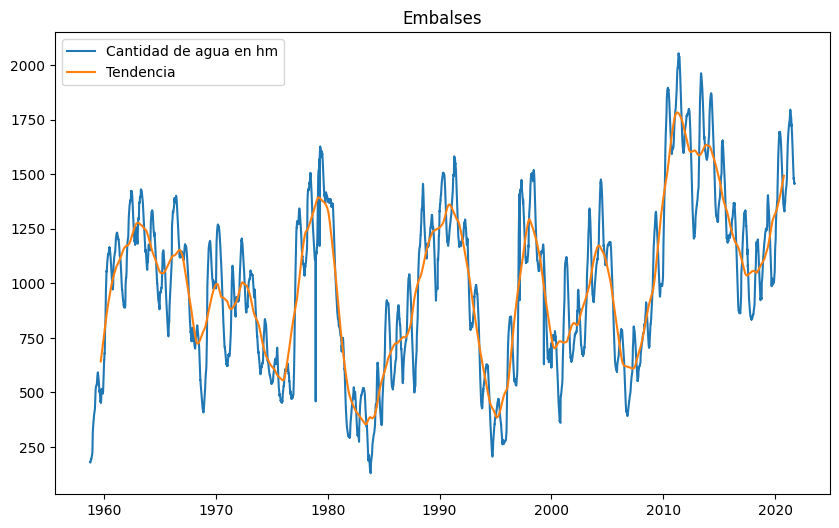

In [271]:
df_quantity_embalses = df_merge_embalses.groupby('date')['quantity_hm3_embalses'].sum()
result_quantity_hm3 = seasonal_decompose(df_quantity_embalses.dropna(), model='additive', period=700)
trend_quantity_hm3 = result_quantity_hm3.trend

plt.figure(figsize=(10, 6))  
plt.title('Embalses')

#df_quantity_filtered1 = df_quantity_filtered1.replace(0, pd.NA).ffill()
plt.plot(df_quantity_embalses, label = 'Cantidad de agua en hm')
plt.plot(trend_quantity_hm3, label = 'Tendencia')
plt.legend()
plt.show()

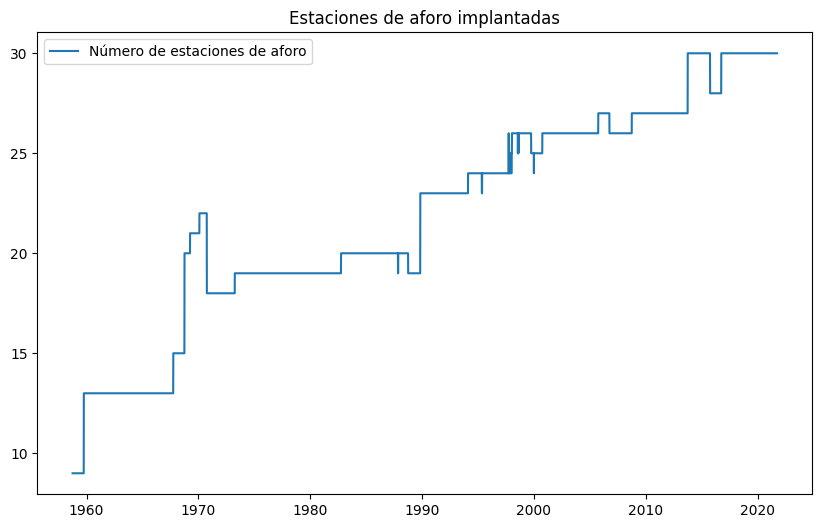

In [500]:
n_stationsFecha = df_merge_embalses.groupby('date')['id_station'].nunique()
plt.figure(figsize=(10, 6))  
plt.plot(n_stationsFecha,label = 'Número de estaciones de aforo')
plt.title('Estaciones de aforo implantadas')
plt.legend()
plt.show()

### Ríos y canales

In [294]:
df_closest_rios = pd.read_csv('BBDD/df_closest_rios.csv')
df_rios_canales = pd.read_csv('BBDD/df_rios_canales.csv')
df_rios_canales['date'] = pd.to_datetime(df_rios_canales['date'])
df_merge_riosCanales = pd.merge(df_closest_rios[['pixel_copernicus', 'id_station']], df_rios_canales, on='id_station', how = 'inner')
df_merge_riosCanales = df_merge_riosCanales.rename(columns = {'quantity_hm3': 'quantity_hm3_riosCanales'})
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].str.replace(',', '.')
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].fillna(0)
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].astype('float')
df_merge_riosCanales = df_merge_riosCanales[df_merge_riosCanales['date'].dt.year >= 1960]

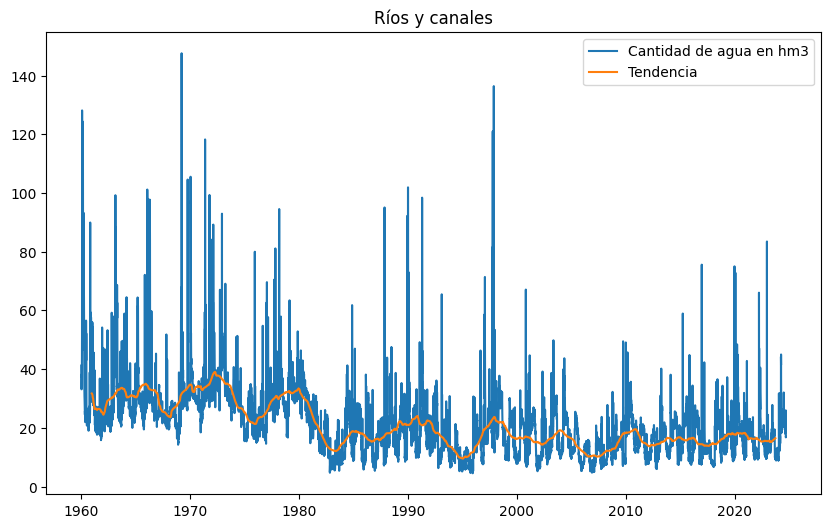

In [302]:
df_quantity_riosCanales = df_merge_riosCanales.groupby('date')['quantity_hm3_riosCanales'].sum()
result_quantity_rios = seasonal_decompose(df_quantity_riosCanales.dropna(), model='additive', period=700)
trend_quantity_rios = result_quantity_rios.trend

plt.figure(figsize=(10, 6))  
plt.title('Ríos y canales')
plt.plot(df_quantity_riosCanales, label = 'Cantidad de agua en hm3')
plt.plot(trend_quantity_rios, label = 'Tendencia')
plt.legend()
plt.show()

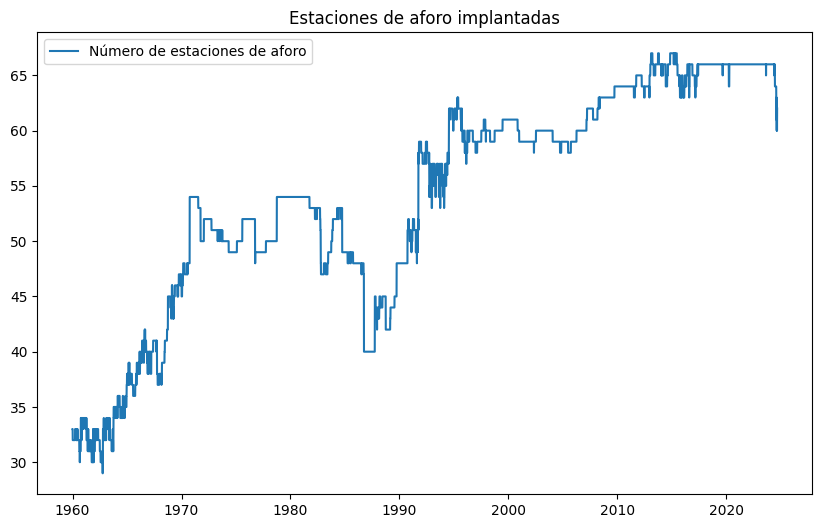

In [501]:
n_stationsFecha = df_merge_riosCanales.groupby('date')['id_station'].nunique()
plt.figure(figsize=(10, 6))  
plt.plot(n_stationsFecha,label = 'Número de estaciones de aforo')
plt.title('Estaciones de aforo implantadas')
plt.legend()
plt.show()

### La albufera

In [340]:
df_closest_albufera = pd.read_csv('BBDD/df_closest_albufera.csv')
df_albufera = pd.read_csv('BBDD/df_albufera.csv')
df_albufera['date'] = pd.to_datetime(df_albufera['date'])
df_merge_albufera = pd.merge(df_closest_albufera[['pixel_copernicus', 'id_station']], df_albufera, on='id_station', how = 'inner')
df_merge_albufera = df_merge_albufera.rename(columns = {'quantity_hm3': 'quantity_hm3_albufera'})

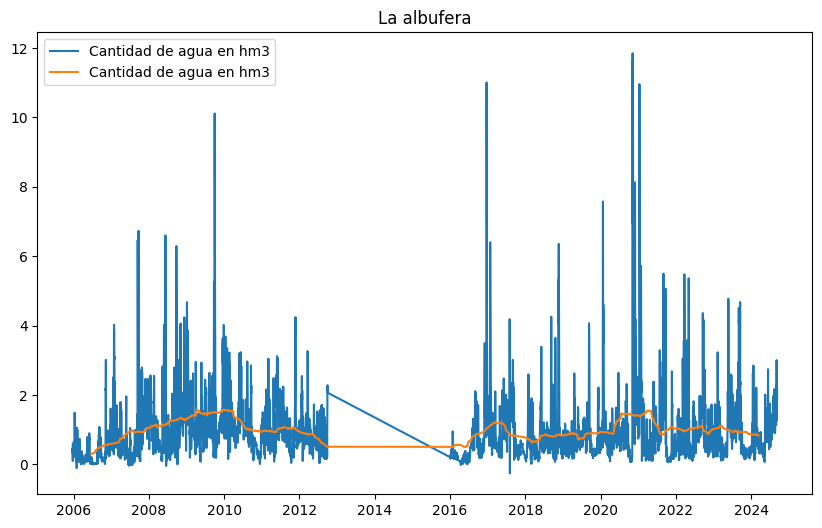

In [342]:
#df_merge_albufera= df_merge_albufera[df_merge_albufera['date'].dt.year >= 2016]
df_quantity_albufera = df_merge_albufera.groupby('date')['quantity_hm3_albufera'].sum()
result_quantity_albufera = seasonal_decompose(df_quantity_albufera.dropna(), model='additive', period=365)
trend_quantity_albufera = result_quantity_albufera.trend
plt.figure(figsize=(10, 6))  
plt.title('La albufera')
plt.plot(df_quantity_albufera, label = 'Cantidad de agua en hm3')
plt.plot(trend_quantity_albufera, label = 'Tendencia')
plt.legend()
plt.show()

In [14]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')

In [29]:
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])

In [24]:
total_precipitation_CHJucar = df_copernicus.groupby('date').sum().reset_index()[['date','total_precipitation']]

In [357]:
print('corr(rios, embalses) =',df_quantity_riosCanales.corr(df_quantity_embalses))
print('corr(rios, albufera) =',df_quantity_riosCanales.corr(df_quantity_albufera))
print('corr(embalses, albufera) =',df_quantity_embalses.corr(df_quantity_albufera))

corr(rios, embalses) = 0.23239763368450087
corr(rios, albufera) = 0.16028949565396336
corr(embalses, albufera) = 0.07537010297247411


## Exploración Machine Learning

### Var dependiente: Embalses

Usamo como variable dependiente: Cantidad de hm3 de agua proveniente de embalses

#### Correlaciones

In [9]:
df_closest_embalses = pd.read_csv('BBDD/df_closest_embalses.csv')
df_embalses_cedex = pd.read_csv('BBDD/df_embalses_cedex.csv')
df_merge_embalses = pd.merge(df_closest_embalses[['pixel_copernicus', 'id_station']], df_embalses_cedex, on='id_station', how = 'inner')
df_merge_embalses = df_merge_embalses.rename(columns = {'quantity_hm3': 'quantity_hm3_embalses'})
df_merge_embalses['date'] = pd.to_datetime(df_merge_embalses['date'])

df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])

df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')
df_merge_coperEmbalses['quantity_hm3_embalses'] = df_merge_coperEmbalses['quantity_hm3_embalses'].astype('float')
df_merge_coperEmbalses = df_merge_coperEmbalses[['date','quantity_hm3_embalses','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover']]
df_merge_coperEmbalses = df_merge_coperEmbalses.groupby('date').sum().reset_index()
df_merge_coperEmbalses = df_merge_coperEmbalses.sort_values('date')

df_merge_coperEmbalses.corr().sort_values('quantity_hm3_embalses', ascending=False)['quantity_hm3_embalses']

quantity_hm3_embalses    1.000000
soil_water_l4            0.282177
date                     0.254520
skin_temperature         0.214948
low_vegetation_cover     0.214116
high_vegetation_cover    0.209595
soil_water_l3            0.111327
soil_water_l2            0.071702
soil_water_l1            0.063377
total_precipitation      0.004351
snowfall                -0.001669
runoff                  -0.002100
evaporation             -0.187480
Name: quantity_hm3_embalses, dtype: float64

#### Análisis gráfico

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')
df_merge_coperEmbalses['quantity_hm3_embalses'] = df_merge_coperEmbalses['quantity_hm3_embalses'].astype('float')
df_merge_coperEmbalses = df_merge_coperEmbalses[['date','quantity_hm3_embalses','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover']]
df_merge_coperEmbalses = df_merge_coperEmbalses.groupby('date').sum()

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_merge_coperEmbalses_scaled = pd.DataFrame(scaler.fit_transform(df_merge_coperEmbalses), 
                                             columns=df_merge_coperEmbalses.columns, 
                                             index=df_merge_coperEmbalses.index)


result_high_vegetation_cover  = seasonal_decompose(df_merge_coperEmbalses_scaled['high_vegetation_cover'].dropna(), model='additive', period=700)
trend_high_vegetation_cover  = result_high_vegetation_cover.trend

result_quantity_hm3 = seasonal_decompose(df_merge_coperEmbalses_scaled['quantity_hm3_embalses'].dropna(), model='additive', period=700)
trend_quantity_hm3 = result_quantity_hm3.trend

result_soil_water = seasonal_decompose(df_merge_coperEmbalses_scaled['soil_water_l4'].dropna(), model='additive', period=700)
trend_soil_water = result_soil_water.trend

result_total_precipitations = seasonal_decompose(df_merge_coperEmbalses_scaled['total_precipitation'].dropna(), model='additive', period=700)
trend_total_precipitations = result_total_precipitations.trend


##### High vegetation cover

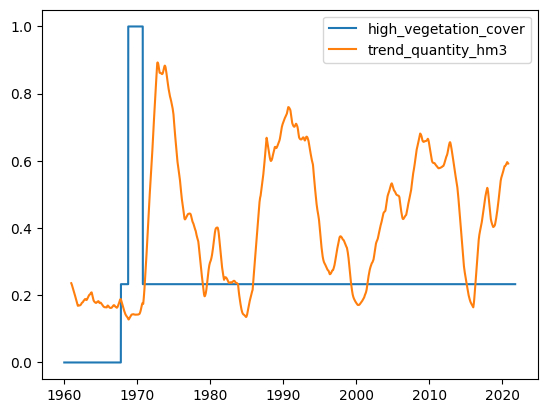

In [524]:
plt.plot(df_merge_coperEmbalses_scaled['high_vegetation_cover'],label = 'high_vegetation_cover')
plt.plot(trend_quantity_hm3,label = 'trend_quantity_hm3')
plt.legend()
plt.show()

##### Soil water

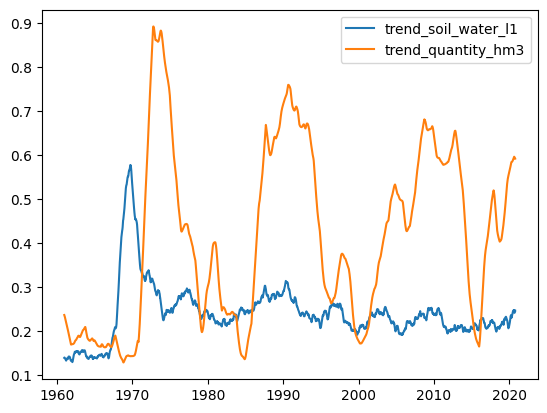

In [376]:
result_soil_water_l1 = seasonal_decompose(df_merge_coperEmbalses_scaled['soil_water_l1'].dropna(), model='additive', period=700)
trend_soil_water_l1 = result_soil_water_l1.trend

plt.plot(trend_soil_water_l1,label = 'trend_soil_water_l1')
plt.plot(trend_quantity_hm3,label = 'trend_quantity_hm3')
plt.legend()
plt.show()

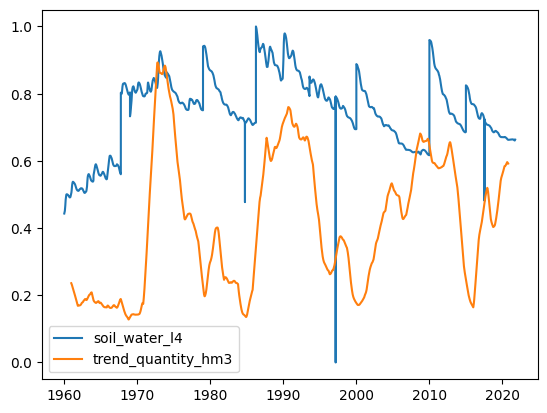

In [218]:
plt.plot(df_merge_coperEmbalses_scaled['soil_water_l4'],label ='soil_water_l4' )
plt.plot(trend_quantity_hm3,label = 'trend_quantity_hm3')
plt.legend()
plt.show()

##### skin_temperature

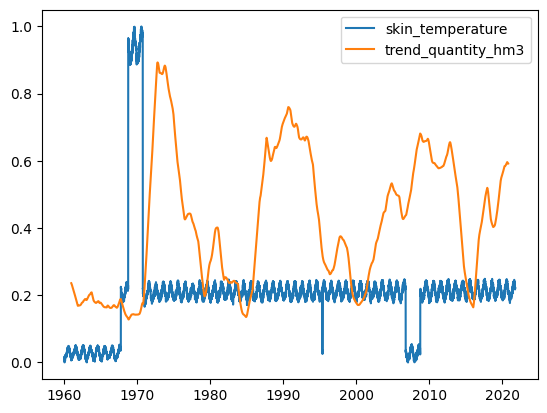

In [278]:
plt.plot(df_merge_coperEmbalses_scaled['skin_temperature'],label ='skin_temperature' )
plt.plot(trend_quantity_hm3,label = 'trend_quantity_hm3')
plt.legend()
plt.show()

##### total_precipitation

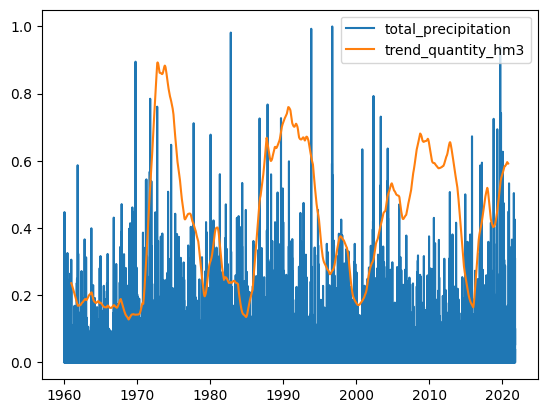

In [227]:
plt.plot(df_merge_coperEmbalses_scaled['total_precipitation'],label ='total_precipitation' )
plt.plot(trend_quantity_hm3,label = 'trend_quantity_hm3')
plt.legend()
plt.show()

##### evaporation

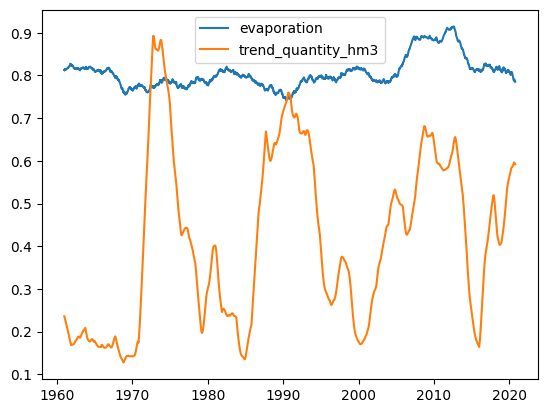

In [224]:
result_total_evaporation= seasonal_decompose(df_merge_coperEmbalses_scaled['evaporation'].dropna(), model='additive', period=700)
trend_total_evaporation = result_total_evaporation.trend

plt.plot(trend_total_evaporation,label ='evaporation' )
plt.plot(trend_quantity_hm3,label = 'trend_quantity_hm3')
plt.legend()
plt.show()

#### Regresión lineal

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy.linalg import cond
from itertools import combinations

In [153]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')
df_merge_coperEmbalses['quantity_hm3_embalses'] = df_merge_coperEmbalses['quantity_hm3_embalses'].astype('float')
df_merge_coperEmbalses = df_merge_coperEmbalses[['quantity_hm3_embalses','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover']]
#df_merge_coperEmbalses = pd.get_dummies(df_merge_coperEmbalses, columns=['pixel'])
#df_merge_coperEmbalses= df_merge_coperEmbalses.replace({True: 1, False: 0})

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_merge_coperEmbalses_scaled = pd.DataFrame(scaler.fit_transform(df_merge_coperEmbalses), 
                                             columns=df_merge_coperEmbalses.columns, 
                                             index=df_merge_coperEmbalses.index)

y = df_merge_coperEmbalses_scaled['quantity_hm3_embalses']
X_features = ['total_precipitation', 'skin_temperature', 'evaporation', 'runoff', 'snowfall',
               'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
               'high_vegetation_cover', 'low_vegetation_cover']

results = []

# Iterar sobre el número de características a usar
for num_features in range(1, len(X_features) + 1):
    for feature_combination in combinations(X_features, num_features):
        # Opción 1: Sin constante
        X = df_merge_coperEmbalses_scaled[list(feature_combination)]
        
        # Ajustar el modelo de regresión lineal sin constante
        model = LinearRegression(fit_intercept=False)  # fit_intercept=False para no incluir la constante
        model.fit(X, y)
        
        # Realizar predicciones
        y_pred = model.predict(X)
        
        # Calcular R^2
        r2 = r2_score(y, y_pred)
        
        # Calcular el número condicional sin constante
        number_condition = cond(np.dot(X.T, X))
        
        # Guardar los resultados sin constante
        results.append({
            'Features': feature_combination,
            'R^2': r2,
            'Conditional Number': number_condition,
            'Constant Included': False
        })
        
        # Opción 2: Con constante
        X_const = np.c_[np.ones(X.shape[0]), X]  # Añadir columna de unos para el término de intersección
        
        # Ajustar el modelo de regresión lineal con constante
        model_const = LinearRegression(fit_intercept=False)  # fit_intercept=False ya que se añade manualmente la constante
        model_const.fit(X_const, y)
        
        # Realizar predicciones
        y_pred_const = model_const.predict(X_const)
        
        # Calcular R^2 con constante
        r2_const = r2_score(y, y_pred_const)
        
        # Calcular el número condicional con constante
        number_condition_const = cond(np.dot(X_const.T, X_const))
        
        # Guardar los resultados con constante
        results.append({
            'Features': feature_combination,
            'R^2': r2_const,
            'Conditional Number': number_condition_const,
            'Constant Included': True
        })

# Convertir los resultados a DataFrame
results_df = pd.DataFrame(results)

KeyboardInterrupt: 

In [42]:
results_df[results_df['Conditional Number']<50].sort_values(by='R^2', ascending=False)

,Features,R^2,Conditional Number,Constant Included
3641,"(total_precipitation, skin_temperature, evapor...",0.274287,41.017297,True
3640,"(total_precipitation, skin_temperature, evapor...",0.274287,41.017297,False
3401,"(skin_temperature, evaporation, runoff, snowfa...",0.274287,40.533348,True
3400,"(skin_temperature, evaporation, runoff, snowfa...",0.274287,40.533348,False
3011,"(total_precipitation, skin_temperature, evapor...",0.274251,40.673531,True
...,...,...,...,...
29,"(total_precipitation, snowfall)",0.001588,1.639033,True
8,"(snowfall,)",0.001550,1.000000,False
9,"(snowfall,)",0.001550,1.000000,True
0,"(total_precipitation,)",0.000240,1.000000,False


In [45]:
results_df.loc[3641]['Features']

('total_precipitation',
 'skin_temperature',
 'evaporation',
 'runoff',
 'snowfall',
 'soil_water_l1',
 'soil_water_l3',
 'high_vegetation_cover')

#### Causalidad

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

def vars_endogena(df, var_ind, var_dep, minUmbral, funcSeleccionVars):
    """
    Identifies endogenous variables in a set of independent variables.
    
    Parameters:
    df (pandas.DataFrame): The input dataframe.
    var_ind (list): List of independent variables.
    var_dep (str): Dependent variable.
    minUmbral (float): Minimum importance threshold.
    funcSeleccionVars (function): Function to select variables.
    
    Returns:
    dict: A dictionary of endogenous variables and their instruments.
    """
    alfa = 0.05
    instrumentos = {}
    for x_i in var_ind:
        minCorr = 1
        while minCorr > 0:
            if funcSeleccionVars == varsMasCorrelacionadas:
                instrumentos_lista = [i for i in varsMasCorrelacionadas(df=df, varDependiente=x_i, minCorr=minUmbral) if i not in var_ind and i not in var_dep]
            if funcSeleccionVars == varsMasImportantesArbol:
                instrumentos_lista = [i for i in varsMasImportantesArbol(df=df, varDependiente=x_i, minUmbral=minUmbral) if i not in var_ind and i not in var_dep]
            if len(instrumentos_lista) >= len(var_ind):
                break
            else:
                minCorr -= 0.01
        v = residuo(varsIndependientes=instrumentos_lista, varDependiente=x_i, df=df)
        x_df = df.copy()
        x_df = x_df[var_ind]
        x_df['v'] = v
        x_df = sm.add_constant(x_df)
        model = sm.OLS(df[var_dep], x_df).fit()
        p_values = dict(model.pvalues)
        if alfa > p_values['v']:
            instrumentos.update({x_i: instrumentos_lista})
    return instrumentos
    
def estimacion (varsIndependientes, varDependiente, df,intercept = False):
    """
    Estimates the dependent variable using a regression model.
    
    Parameters:
    varsIndependientes (list): List of independent variables.
    varDependiente (str): Dependent variable.
    df (pandas.DataFrame): The input dataframe.
    intercept (bool): Whether to include an intercept in the regression.
    
    Returns:
    numpy.ndarray: The estimated values of the dependent variable.
    """
    #if list(df[varDependiente].unique()) == [0, 1]:
    #    modelo_regresion = LinearRegression()
    #    modelo_regresion.fit(df[varsIndependientes], df[varDependiente])
    #    varDependiente_hat = modelo_regresion.predict(df[varsIndependientes])
    #    return varDependiente_hat
    #else:
    modelo_regresion = LinearRegression(fit_intercept=intercept)
    modelo_regresion.fit(df[varsIndependientes], df[varDependiente])
    varDependiente_hat = modelo_regresion.predict(df[varsIndependientes])
    return varDependiente_hat
        

def regresion(X, y, const=1):
    """
    Perform OLS regression.

    Parameters:
    X : DataFrame or ndarray
        Independent variables.
    y : Series or ndarray
        Dependent variable.
    const : int, optional
        Whether to include a constant (default is 1, include constant).

    Returns:
    results : RegressionResults
        Results of the regression.
    """
    if const == 1:
        X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    return results

def residuo(varsIndependientes, varDependiente, df, intercept=False):
    """
    Calculates the residuals of a regression model.
    
    Parameters:
    varsIndependientes (list): List of independent variables.
    varDependiente (str): Dependent variable.
    df (pandas.DataFrame): The input dataframe.
    intercept (bool): Whether to include an intercept in the regression.
    
    Returns:
    numpy.ndarray: The residuals of the regression.
    """
    if list(df[varDependiente].unique()) == [0, 1]:
        regresion = sm.Logit(df[varDependiente], df[varsIndependientes])
    else:
        regresion = sm.OLS(df[varDependiente], df[varsIndependientes])
    resultados = regresion.fit()
    v = resultados.resid
    return v


In [68]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'right')
df_merge_coperEmbalses['quantity_hm3_embalses'] = df_merge_coperEmbalses['quantity_hm3_embalses'].astype('float')
df_merge_coperEmbalses = df_merge_coperEmbalses[['quantity_hm3_embalses','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover','pixel']]
df_merge_coperEmbalses = df_merge_coperEmbalses.fillna(0)

In [69]:
df_merge_coperEmbalses = pd.get_dummies(df_merge_coperEmbalses, columns=['pixel'])
df_merge_coperEmbalses = df_merge_coperEmbalses.replace({True: 1, False: 0})

In [70]:
df_merge_coperEmbalses.corr()

,quantity_hm3_embalses,total_precipitation,skin_temperature,evaporation,runoff,snowfall,soil_water_l1,soil_water_l2,soil_water_l3,soil_water_l4,...,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29
quantity_hm3_embalses,1.000000,-0.004173,-0.036081,0.075516,-0.020639,0.005856,0.132865,0.121670,0.103422,0.142308,...,0.305230,-0.048900,-0.042948,-0.043008,-0.042947,-0.034827,-0.024027,-0.001947,-0.058526,-0.033877
total_precipitation,-0.004173,1.000000,-0.093594,-0.117696,0.656049,0.209467,0.221565,0.113028,0.043684,0.041254,...,-0.002750,0.007241,-0.000958,-0.010188,0.013537,0.011124,0.011803,0.019984,0.042949,0.010698
skin_temperature,-0.036081,-0.093594,1.000000,-0.242268,-0.064713,-0.154150,-0.547933,-0.518911,-0.396953,-0.247782,...,-0.043832,-0.010691,0.031541,0.065107,-0.073611,-0.085371,-0.081774,-0.054912,-0.042109,0.018467
evaporation,0.075516,-0.117696,-0.242268,1.000000,-0.036932,0.047089,0.178881,0.216571,0.200676,0.218526,...,0.095328,0.069689,-0.050330,-0.123323,0.017805,0.019755,0.028655,0.007902,-0.112616,-0.120383
runoff,-0.020639,0.656049,-0.064713,-0.036932,1.000000,0.063937,0.234169,0.187385,0.141722,0.124641,...,-0.019090,0.017500,-0.000670,-0.021606,0.009731,0.004317,0.015407,0.046686,0.136745,0.042936
snowfall,0.005856,0.209467,-0.154150,0.047089,0.063937,1.000000,0.109518,0.089799,0.073123,0.056555,...,0.013588,-0.003460,-0.006406,-0.013537,0.028854,0.040667,0.041809,0.027862,0.003085,-0.008707
soil_water_l1,0.132865,0.221565,-0.547933,0.178881,0.234169,0.109518,1.000000,0.960405,0.832275,0.783868,...,0.109509,0.121605,-0.093886,-0.226463,0.131417,0.128569,0.121973,0.128324,0.226464,-0.019940
soil_water_l2,0.121670,0.113028,-0.518911,0.216571,0.187385,0.089799,0.960405,1.000000,0.908398,0.826098,...,0.087979,0.101360,-0.106977,-0.241892,0.132595,0.125300,0.113514,0.120445,0.240485,-0.014781
soil_water_l3,0.103422,0.043684,-0.396953,0.200676,0.141722,0.073123,0.832275,0.908398,1.000000,0.888053,...,0.031506,0.058050,-0.111552,-0.241604,0.151486,0.131529,0.103775,0.113267,0.295669,0.017908
soil_water_l4,0.142308,0.041254,-0.247782,0.218526,0.124641,0.056555,0.783868,0.826098,0.888053,1.000000,...,0.096721,0.113554,-0.117703,-0.261088,0.183550,0.155542,0.120812,0.126686,0.317399,0.017628


In [71]:
regresion(X = df_merge_coperEmbalses[['snowfall', 'runoff','soil_water_l1']], y = df_merge_coperEmbalses['total_precipitation'], const=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     total_precipitation   R-squared:                       0.461
Model:                             OLS   Adj. R-squared:                  0.461
Method:                  Least Squares   F-statistic:                 2.669e+05
Date:                 Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                         22:52:54   Log-Likelihood:             4.2392e+06
No. Observations:               934547   AIC:                        -8.478e+06
Df Residuals:                   934543   BIC:                        -8.478e+06
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005    5.2e-06     95.101      0.000       0.000       0.001
snowfall          1.4185      0.007    213.177      0.000       1.405       1.432
runoff            7.2373      0.009    809.557      0.000       7.220       7.255
soil_water_l1     0.0002   3.25e-06     70.845      0.000       0.000       0.000
==============================================================================
Omnibus:                   481789.285   Durbin-Watson:                   0.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6391607025.016
Skew:                           0.461   Prob(JB):                         0.00
Kurtosis:                     408.144   Cond. No.                     6.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Tendencias

In [52]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'right')
df_merge_coperEmbalses['quantity_hm3_embalses'] = df_merge_coperEmbalses['quantity_hm3_embalses'].astype('float')
df_merge_coperEmbalses = df_merge_coperEmbalses[['date','quantity_hm3_embalses','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover','pixel']]
df_merge_coperEmbalses = df_merge_coperEmbalses.fillna(0)
df_merge_coperEmbalses = pd.get_dummies(df_merge_coperEmbalses, columns=['pixel'])
df_merge_coperEmbalses = df_merge_coperEmbalses.replace({True: 1, False: 0})
df_merge_coperEmbalses.set_index('date', inplace=True)

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose


#df_merge_coperEmbalses.set_index('date', inplace=True)

trend_dict = {}

# Iterar sobre cada píxel
for pixel in df_merge_coperEmbalses.columns:
    if pixel.startswith('pixel_'):
        # Filtrar los datos para cada píxel
        pixel_data = df_merge_coperEmbalses[df_merge_coperEmbalses[pixel] == 1]
        
        # Descomposición estacional de la serie temporal de 'total_precipitation' para este píxel
        result = seasonal_decompose(pixel_data['total_precipitation'].dropna(), model='additive', period=365)
        trend = result.trend
        
        # Almacenar la tendencia en el diccionario con la clave como el nombre del píxel
        trend_dict[pixel] = trend
trend_df = pd.DataFrame(trend_dict)

# Reemplazar los NaN por ceros en el DataFrame de tendencias
trend_df.fillna(0, inplace=True)
trend_df.columns = [f'{col}_precipitations_trend' for col in trend_df.columns]
trend_df = trend_df.set_index(df_merge_coperEmbalses.index)
df_merge_coperEmbalses = pd.concat([df_merge_coperEmbalses, trend_df], axis=1)
trend_columns = [
    'pixel_0_precipitations_trend',
    'pixel_1_precipitations_trend',
    'pixel_2_precipitations_trend',
    'pixel_3_precipitations_trend',
    'pixel_4_precipitations_trend',
    'pixel_5_precipitations_trend',
    'pixel_6_precipitations_trend',
    'pixel_7_precipitations_trend',
    'pixel_8_precipitations_trend',
    'pixel_9_precipitations_trend',
    'pixel_10_precipitations_trend',
    'pixel_11_precipitations_trend',
    'pixel_12_precipitations_trend',
    'pixel_13_precipitations_trend',
    'pixel_14_precipitations_trend',
    'pixel_15_precipitations_trend',
    'pixel_16_precipitations_trend',
    'pixel_17_precipitations_trend',
    'pixel_18_precipitations_trend',
    'pixel_19_precipitations_trend',
    'pixel_20_precipitations_trend',
    'pixel_21_precipitations_trend',
    'pixel_22_precipitations_trend',
    'pixel_23_precipitations_trend',
    'pixel_24_precipitations_trend',
    'pixel_25_precipitations_trend',
    'pixel_26_precipitations_trend',
    'pixel_27_precipitations_trend',
    'pixel_28_precipitations_trend',
    'pixel_29_precipitations_trend'
]

# Sumar las columnas y crear una nueva columna 'trend_total_precipitations'
df_merge_coperEmbalses['trend_total_precipitations'] = df_merge_coperEmbalses[trend_columns].sum(axis=1)

# Eliminar las columnas originales de tendencias
df_merge_coperEmbalses.drop(columns=trend_columns, inplace=True)


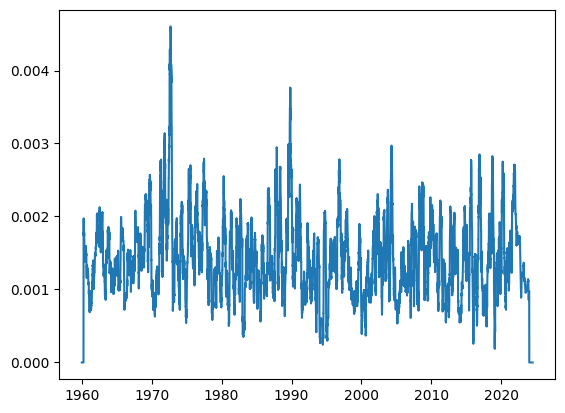

In [67]:
plt.plot((df_merge_coperEmbalses[df_merge_coperEmbalses['pixel_21'] == 1])['trend_total_precipitations'])
plt.show()

##### Frecuencia mensual

In [3]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'right')
df_merge_coperEmbalses['quantity_hm3_embalses'] = df_merge_coperEmbalses['quantity_hm3_embalses'].astype('float')
df_merge_coperEmbalses = df_merge_coperEmbalses[['date','quantity_hm3_embalses','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover','pixel']]

NameError: name 'df_merge_embalses' is not defined

In [237]:
monthly_df = pd.DataFrame()

# Agrupar por cada pixel y luego hacer la resample a frecuencia mensual
for pixel, group in df_merge_coperEmbalses.groupby('pixel'):
    # Resamplear a frecuencia mensual y calcular la media
    monthly_group = group.set_index('date').resample('M').mean()
    monthly_group['pixel'] = pixel  # Añadir de nuevo la información del píxel

    # Concatenar los resultados en el DataFrame final
    monthly_df = pd.concat([monthly_df, monthly_group])

# Resetear el índice del DataFrame final
monthly_df.reset_index(inplace=True)
monthly_df = monthly_df.dropna()

In [255]:
monthly_df['soil_water'] = monthly_df['soil_water_l1'] + monthly_df['soil_water_l2'] + monthly_df['soil_water_l3'] + monthly_df['soil_water_l4']

C:\Users\nacho\AppData\Local\Temp\ipykernel_1504\1912502125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_df['soil_water'] = monthly_df['soil_water_l1'] + monthly_df['soil_water_l2'] + monthly_df['soil_water_l3'] + monthly_df['soil_water_l4']


In [264]:
monthly_df['total_precipitation_sqrt'] = monthly_df['total_precipitation']**2 

C:\Users\nacho\AppData\Local\Temp\ipykernel_1504\3804357962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_df['total_precipitation_sqrt'] = monthly_df['total_precipitation']**2


In [274]:
monthly_df['total_precipitation_minus_evaporation'] = monthly_df['total_precipitation'] - monthly_df['evaporation']

C:\Users\nacho\AppData\Local\Temp\ipykernel_1504\1366222839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_df['total_precipitation_minus_evaporation'] = monthly_df['total_precipitation'] - monthly_df['evaporation']


In [275]:
monthly_df.corr()

,date,quantity_hm3_embalses,total_precipitation,skin_temperature,evaporation,runoff,snowfall,soil_water_l1,soil_water_l2,soil_water_l3,soil_water_l4,high_vegetation_cover,low_vegetation_cover,pixel,soil_water,total_precipitation_sqrt,total_precipitation_minus_evaporation
date,1.000000,-0.054107,-0.035030,0.098038,0.060577,-0.135735,-0.030365,-0.097469,-0.119783,-0.208988,-0.110960,-0.015907,0.007082,-0.025981,-0.136032,-0.022836,-0.058664
quantity_hm3_embalses,-0.054107,1.000000,-0.028466,-0.074957,0.207282,-0.087553,0.017907,0.273359,0.261038,0.252708,0.274604,0.521268,-0.127041,-0.179222,0.273200,-0.042425,-0.136338
total_precipitation,-0.035030,-0.028466,1.000000,-0.151738,-0.238887,0.608659,0.153627,0.324278,0.279468,0.165566,0.137856,0.086548,0.113572,0.164454,0.240443,0.904584,0.838605
skin_temperature,0.098038,-0.074957,-0.151738,1.000000,-0.419046,-0.116997,-0.442933,-0.554064,-0.531167,-0.426535,-0.311892,-0.245392,-0.177240,-0.138688,-0.477346,-0.059319,0.128163
evaporation,0.060577,0.207282,-0.238887,-0.419046,1.000000,-0.116883,0.256860,0.423724,0.425246,0.370505,0.401711,0.465111,0.334380,-0.106042,0.418535,-0.228363,-0.729300
runoff,-0.135735,-0.087553,0.608659,-0.116997,-0.116883,1.000000,0.091641,0.403891,0.402440,0.385050,0.334925,0.134547,0.257834,0.359133,0.394648,0.629802,0.494427
snowfall,-0.030365,0.017907,0.153627,-0.442933,0.256860,0.091641,1.000000,0.358021,0.342425,0.278799,0.233084,0.170487,0.129096,0.166014,0.316281,0.078948,-0.035849
soil_water_l1,-0.097469,0.273359,0.324278,-0.554064,0.423724,0.403891,0.358021,1.000000,0.987171,0.907395,0.881808,0.750478,0.588493,0.361166,0.975801,0.200381,-0.009217
soil_water_l2,-0.119783,0.261038,0.279468,-0.531167,0.425246,0.402440,0.342425,0.987171,1.000000,0.945670,0.897930,0.732848,0.626488,0.333754,0.988481,0.173873,-0.041644
soil_water_l3,-0.208988,0.252708,0.165566,-0.426535,0.370505,0.385050,0.278799,0.907395,0.945670,1.000000,0.927699,0.700465,0.645065,0.350603,0.970624,0.088610,-0.091189


In [278]:
regresion(X = monthly_df[['total_precipitation_minus_evaporation']], y =monthly_df['quantity_hm3_embalses'] , const=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     quantity_hm3_embalses   R-squared:                       0.019
Model:                               OLS   Adj. R-squared:                  0.018
Method:                    Least Squares   F-statistic:                     201.0
Date:                   Tue, 01 Oct 2024   Prob (F-statistic):           3.22e-45
Time:                           16:20:56   Log-Likelihood:                -67437.
No. Observations:                  10616   AIC:                         1.349e+05
Df Residuals:                      10614   BIC:                         1.349e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    92.2588      2.986     30.898      0.000      86.406      98.112
total_precipitation_minus_evaporation   -1.2e+04    846.616    -14.179      0.000   -1.37e+04   -1.03e+04
==============================================================================
Omnibus:                     9177.413   Durbin-Watson:                   0.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           215166.430
Skew:                           4.269   Prob(JB):                         0.00
Kurtosis:                      23.335   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Arbol de decisión

In [222]:
from sklearn.tree import DecisionTreeRegressor

In [218]:
df_closest_embalses = pd.read_csv('BBDD/df_closest_embalses.csv')
df_embalses_cedex = pd.read_csv('BBDD/df_embalses_cedex.csv')
df_merge_embalses = pd.merge(df_closest_embalses[['pixel_copernicus', 'id_station']], df_embalses_cedex, on='id_station', how = 'inner')
df_merge_embalses = df_merge_embalses.rename(columns = {'quantity_hm3': 'quantity_hm3_embalses'})
df_merge_embalses['date'] = pd.to_datetime(df_merge_embalses['date'])

In [219]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')
df_merge_coperEmbalses['quantity_hm3_embalses'] = df_merge_coperEmbalses['quantity_hm3_embalses'].astype('float')
df_merge_coperEmbalses = df_merge_coperEmbalses[['date','quantity_hm3_embalses','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover']]
df_merge_coperEmbalses.set_index('date', inplace=True)

In [220]:
scaler = StandardScaler()
df_merge_coperEmbalses_scaled = pd.DataFrame(scaler.fit_transform(df_merge_coperEmbalses), 
                                             columns=df_merge_coperEmbalses.columns, 
                                             index=df_merge_coperEmbalses.index)

In [223]:
X = df_merge_coperEmbalses_scaled[['quantity_hm3_embalses',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover']]
y = df_merge_coperEmbalses_scaled[['total_precipitation']]

model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Ajusta max_depth según sea necesario
model.fit(X, y)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [224]:
plt.figure(figsize=(12,8))  
plot_tree(model, feature_names=[ 'total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover', 'type_high_vegetation',
       'type_low_vegetation'], filled=True, fontsize=8)
plt.show()

NameError: name 'plot_tree' is not defined

<Figure size 1200x800 with 0 Axes>

In [225]:
importances = pd.DataFrame({'Variable': ['total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover'], 'Importancia': model.feature_importances_})

# Ordenar las variables por importancia
importances = importances.sort_values(by='Importancia', ascending=False)
print(importances)

                 Variable  Importancia
3                  runoff     0.862128
7           soil_water_l3     0.063590
10   low_vegetation_cover     0.037798
2             evaporation     0.012596
8           soil_water_l4     0.012517
6           soil_water_l2     0.006569
9   high_vegetation_cover     0.003775
4                snowfall     0.001027
0     total_precipitation     0.000000
1        skin_temperature     0.000000
5           soil_water_l1     0.000000


##### Por pixel

In [240]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')
df_merge_coperEmbalses.set_index('date', inplace=True)

In [243]:
importancias_pixel = {}
for pixel in df_merge_coperEmbalses['pixel'].unique():
    df_pixel = df_merge_coperEmbalses[df_merge_coperEmbalses['pixel'] == pixel]
    X = df_pixel[['total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover', 'type_high_vegetation',
       'type_low_vegetation']]
    y = df_pixel[['quantity_hm3_embalses']]
    model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Ajusta max_depth según sea necesario
    model.fit(X, y)
    importances = pd.Series(model.feature_importances_, index=[
        'total_precipitation', 'skin_temperature', 'evaporation', 'runoff', 
        'snowfall', 'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 
        'soil_water_l4', 'high_vegetation_cover', 'low_vegetation_cover', 
        'type_high_vegetation', 'type_low_vegetation'
    ], name=pixel)
    importancias_pixel[pixel] = importances

# Convertir el diccionario en un DataFrame
importancias_df = pd.DataFrame(importancias_pixel)

# Opcional: Ordenar las columnas si es necesario
importancias_df = importancias_df.sort_index(axis=1)


In [244]:
importancias_df = importancias_df.T

In [245]:
importancias_df.mean().sort_values(ascending=False)

soil_water_l4            0.512480
skin_temperature         0.310503
soil_water_l3            0.110222
evaporation              0.029958
soil_water_l2            0.018566
soil_water_l1            0.008360
total_precipitation      0.005442
runoff                   0.004469
snowfall                 0.000000
high_vegetation_cover    0.000000
low_vegetation_cover     0.000000
type_high_vegetation     0.000000
type_low_vegetation      0.000000
dtype: float64

#### Red bayesiana

In [76]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination
import pandas as pd

###### Red 1

In [44]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')
df_merge_coperEmbalses = df_merge_coperEmbalses[['quantity_hm3_embalses','total_precipitation', 'evaporation', 'runoff', 'snowfall', 'skin_temperature']]
#df_merge_coperEmbalses = pd.get_dummies(df_merge_coperEmbalses, columns=['type_high_vegetation', 'type_low_vegetation'], drop_first=True)
#df_merge_coperEmbalses = df_merge_coperEmbalses.replace({True: 1, False: 0})

##### Discretización

In [46]:
# Variables que se discretizan por la media
variables_media = ['quantity_hm3_embalses', 'skin_temperature', 'evaporation']

# Variables que se discretizan por comparación con 0
variables_comparacion = ['total_precipitation', 'runoff', 'snowfall']

# Discretización de las variables por la media
for col in variables_media:
    media_col = df_merge_coperEmbalses[col].mean()
    df_merge_coperEmbalses[col] = (df_merge_coperEmbalses[col] > media_col).astype(int)

# Discretización de las variables por comparación con 0
for col in variables_comparacion:
    df_merge_coperEmbalses[col] = (df_merge_coperEmbalses[col] != 0).astype(int)

Construcción red

Una arista (flecha) entre dos variables AAA y BBB indica que el valor de AAA depende directamente del valor de BBB.

Si P(A∣B\=1)P(A|B=1)P(A∣B\=1) y P(A∣B\=0)P(A|B=0)P(A∣B\=0) son significativamente diferentes, esto sugiere que BBB tiene una influencia en AAA, y, por lo tanto, colocamos una flecha de BBB hacia AAA

Si P(A∣B\=1)≠P(A∣B\=0)P(A|B=1) \\neq P(A|B=0)P(A∣B\=1)\=P(A∣B\=0), significa que hay una relación condicional significativa, lo que indicaría que debe haber una flecha desde BBB hacia AAA. La flecha se orientará desde la variable condicional hacia la variable condicionada.

Se puede stablecer un umbral de diferencia para decidir cuándo hay una dependencia lo suficientemente significativa como para poner una flecha. Por ejemplo, si ∣P(A∣B\=1)−P(A∣B\=0)∣\>0.1|P(A|B=1) - P(A|B=0)| > 0.1∣P(A∣B\=1)−P(A∣B\=0)∣\>0.1, se puede considerar significativa

In [57]:
# Definir las variables
variables = ['quantity_hm3_embalses', 'total_precipitation', 'evaporation', 'runoff', 'snowfall', 'skin_temperature']

probabilidades_condicionadas = {}
# Loop sobre cada par de variables
for var_a in variables:
    for var_b in variables:
        if var_a != var_b:
            # P(A|B=1)
            df_b_1 = df_merge_coperEmbalses[df_merge_coperEmbalses[var_b] == 1]
            prob_a_given_b1 = df_b_1[var_a].mean()  # P(A=1 | B=1)
            
            # P(A|B=0)
            df_b_0 = df_merge_coperEmbalses[df_merge_coperEmbalses[var_b] == 0]
            prob_a_given_b0 = df_b_0[var_a].mean()  # P(A=1 | B=0)
 
            if var_a not in probabilidades_condicionadas:
                probabilidades_condicionadas[var_a] = {}
            
            # Añadir las probabilidades condicionales a su subdiccionario
            probabilidades_condicionadas[var_a][var_b] = (prob_a_given_b1, prob_a_given_b0)


In [47]:
hc = HillClimbSearch(df_merge_coperEmbalses)
mejor_modelo = hc.estimate(scoring_method=BicScore(df_merge_coperEmbalses))

# Ver la estructura aprendida
print(mejor_modelo.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('evaporation', 'skin_temperature'), ('evaporation', 'total_precipitation'), ('evaporation', 'quantity_hm3_embalses'), ('evaporation', 'runoff'), ('evaporation', 'snowfall'), ('runoff', 'total_precipitation'), ('runoff', 'quantity_hm3_embalses'), ('runoff', 'skin_temperature'), ('snowfall', 'skin_temperature'), ('snowfall', 'runoff'), ('snowfall', 'total_precipitation'), ('skin_temperature', 'total_precipitation'), ('skin_temperature', 'quantity_hm3_embalses')]


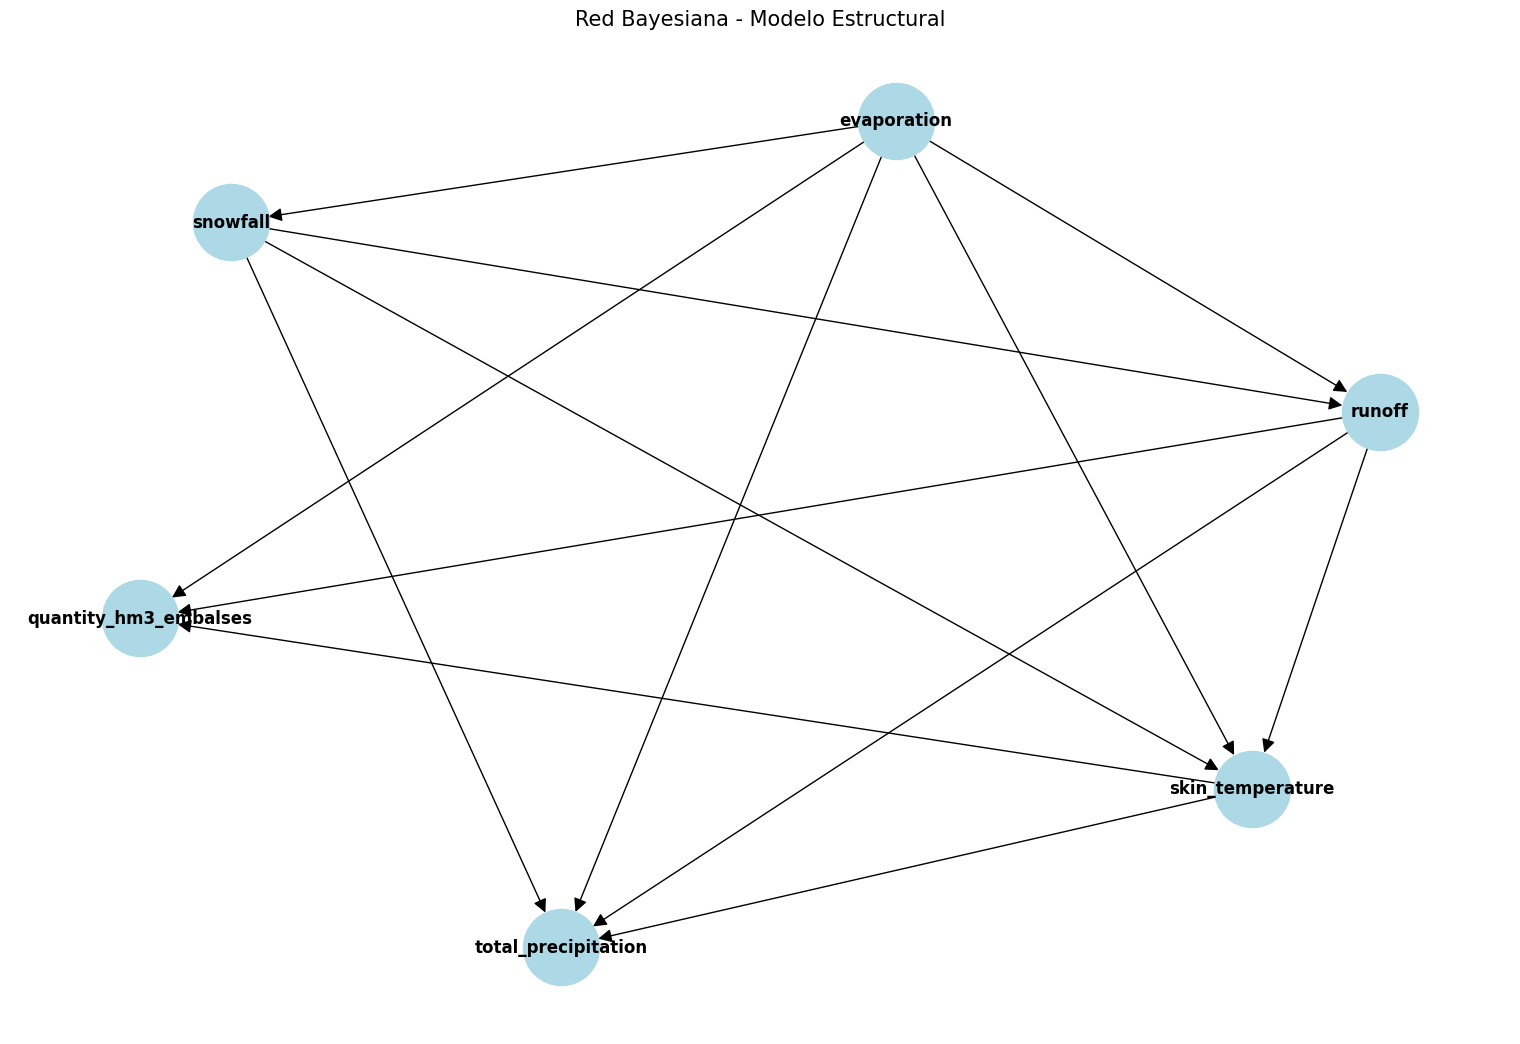

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [('evaporation', 'skin_temperature'), ('evaporation', 'total_precipitation'), ('evaporation', 'quantity_hm3_embalses'), ('evaporation', 'runoff'), ('evaporation', 'snowfall'), ('runoff', 'total_precipitation'), ('runoff', 'quantity_hm3_embalses'), ('runoff', 'skin_temperature'), ('snowfall', 'skin_temperature'), ('snowfall', 'runoff'), ('snowfall', 'total_precipitation'), ('skin_temperature', 'total_precipitation'), ('skin_temperature', 'quantity_hm3_embalses')]
# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir las relaciones al grafo
G.add_edges_from(edges)

# Dibujar el grafo
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=4, seed=42)  # Layout del grafo
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=3000, arrowsize=20)

# Mostrar el grafo
plt.title('Red Bayesiana - Modelo Estructural', size=15)
plt.show()

###### Red 2

In [73]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')
df_merge_coperEmbalses['soil_water'] = df_merge_coperEmbalses['soil_water_l1'] + df_merge_coperEmbalses['soil_water_l2'] + df_merge_coperEmbalses['soil_water_l3'] + df_merge_coperEmbalses['soil_water_l4']
df_merge_coperEmbalses['vegetation_cover'] = df_merge_coperEmbalses['high_vegetation_cover']  + df_merge_coperEmbalses['low_vegetation_cover']  
df_merge_coperEmbalses = df_merge_coperEmbalses[['quantity_hm3_embalses','total_precipitation', 
       'skin_temperature', 'evaporation', 'runoff', 'snowfall','soil_water',
       'vegetation_cover']]


Discretización

In [75]:
# Variables que se discretizan por la media
variables_media = ['quantity_hm3_embalses', 'skin_temperature', 'evaporation','soil_water']

# Variables que se discretizan por comparación con 0
variables_comparacion = ['total_precipitation', 'runoff', 'snowfall','vegetation_cover']

# Discretización de las variables por la media
for col in variables_media:
    media_col = df_merge_coperEmbalses[col].mean()
    df_merge_coperEmbalses[col] = (df_merge_coperEmbalses[col] > media_col).astype(int)

# Discretización de las variables por comparación con 0
for col in variables_comparacion:
    df_merge_coperEmbalses[col] = (df_merge_coperEmbalses[col] != 0).astype(int)

Red

In [77]:
hc = HillClimbSearch(df_merge_coperEmbalses)
mejor_modelo = hc.estimate(scoring_method=BicScore(df_merge_coperEmbalses))

# Ver la estructura aprendida
print(mejor_modelo.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

[('quantity_hm3_embalses', 'soil_water'), ('quantity_hm3_embalses', 'runoff'), ('quantity_hm3_embalses', 'snowfall'), ('quantity_hm3_embalses', 'total_precipitation'), ('total_precipitation', 'snowfall'), ('skin_temperature', 'snowfall'), ('skin_temperature', 'soil_water'), ('skin_temperature', 'evaporation'), ('skin_temperature', 'total_precipitation'), ('skin_temperature', 'runoff'), ('skin_temperature', 'quantity_hm3_embalses'), ('evaporation', 'soil_water'), ('evaporation', 'quantity_hm3_embalses'), ('evaporation', 'runoff'), ('evaporation', 'snowfall'), ('evaporation', 'total_precipitation'), ('runoff', 'total_precipitation'), ('runoff', 'snowfall'), ('soil_water', 'runoff'), ('soil_water', 'snowfall'), ('soil_water', 'total_precipitation')]


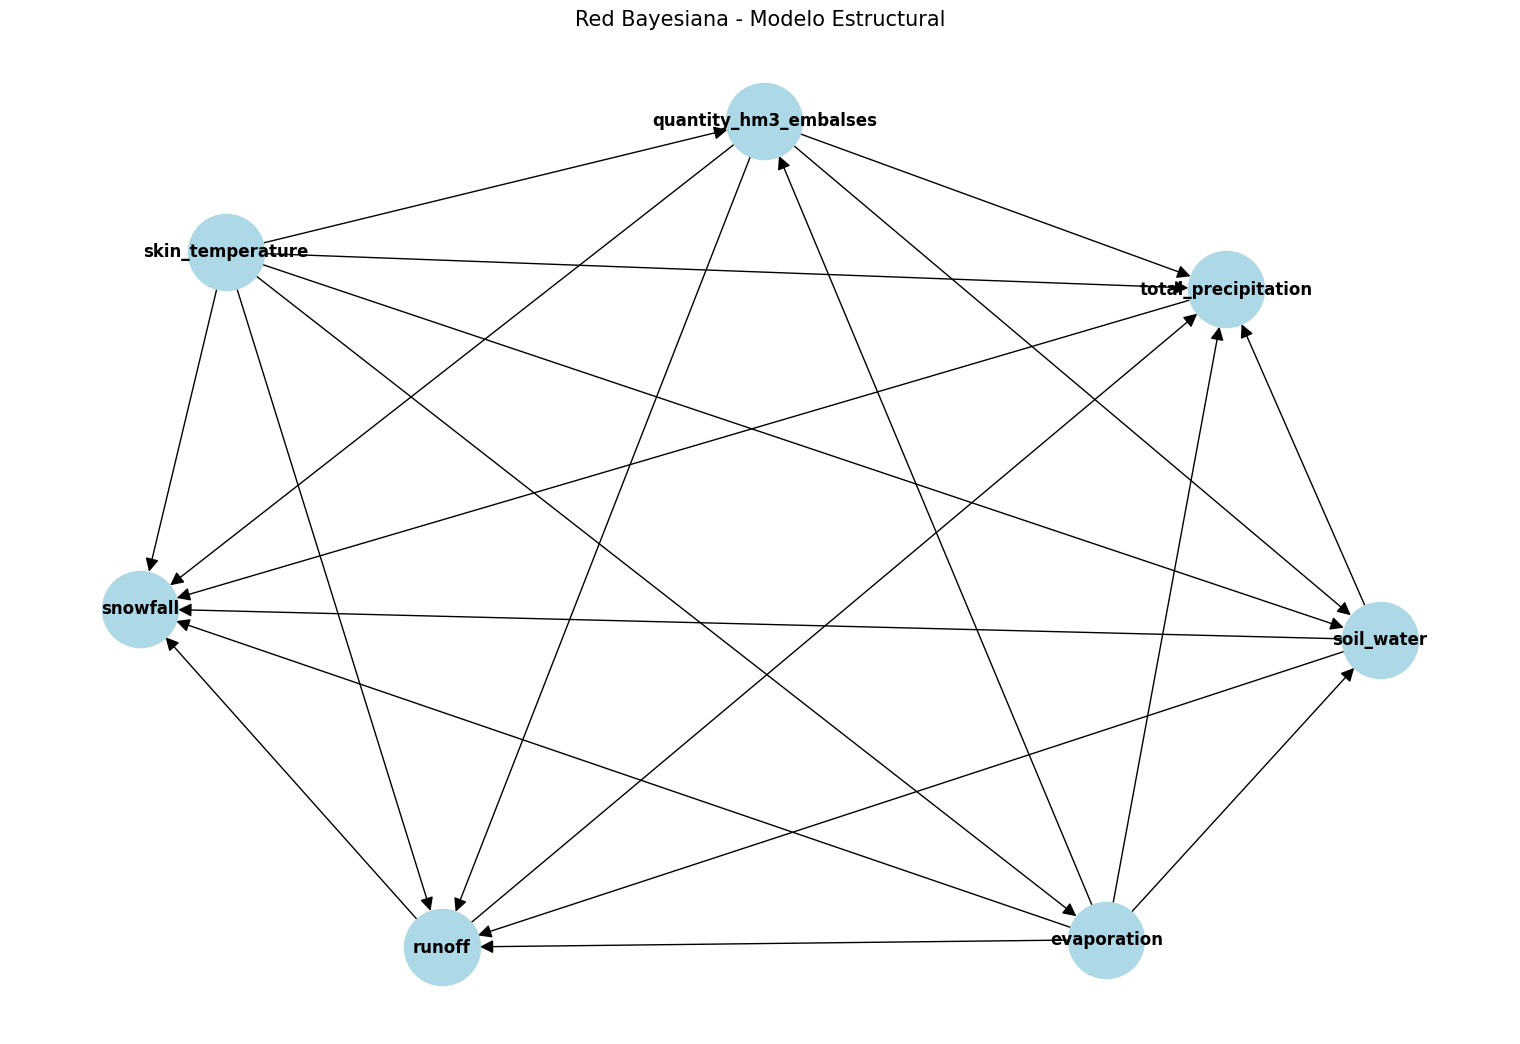

In [79]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [('quantity_hm3_embalses', 'soil_water'), ('quantity_hm3_embalses', 'runoff'), ('quantity_hm3_embalses', 'snowfall'), ('quantity_hm3_embalses', 'total_precipitation'), ('total_precipitation', 'snowfall'), ('skin_temperature', 'snowfall'), ('skin_temperature', 'soil_water'), ('skin_temperature', 'evaporation'), ('skin_temperature', 'total_precipitation'), ('skin_temperature', 'runoff'), ('skin_temperature', 'quantity_hm3_embalses'), ('evaporation', 'soil_water'), ('evaporation', 'quantity_hm3_embalses'), ('evaporation', 'runoff'), ('evaporation', 'snowfall'), ('evaporation', 'total_precipitation'), ('runoff', 'total_precipitation'), ('runoff', 'snowfall'), ('soil_water', 'runoff'), ('soil_water', 'snowfall'), ('soil_water', 'total_precipitation')]
# Crear un grafo dirigido
G = nx.DiGraph()

# Añadir las relaciones al grafo
G.add_edges_from(edges)

# Dibujar el grafo
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=4, seed=42)  # Layout del grafo
nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=3000, arrowsize=20)

# Mostrar el grafo
plt.title('Red Bayesiana - Modelo Estructural', size=15)
plt.show()

### Var dependiente: Ríos canales

In [23]:
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperRiosCanales = pd.merge(df_merge_riosCanales,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')

#### Correlaciones

In [24]:
df_closest_rios = pd.read_csv('BBDD/df_closest_rios.csv')
df_rios_canales = pd.read_csv('BBDD/df_rios_canales.csv')
df_rios_canales['date'] = pd.to_datetime(df_rios_canales['date'])
df_merge_riosCanales = pd.merge(df_closest_rios[['pixel_copernicus', 'id_station']], df_rios_canales, on='id_station', how = 'inner')
df_merge_riosCanales = df_merge_riosCanales.rename(columns = {'quantity_hm3': 'quantity_hm3_riosCanales'})
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].str.replace(',', '.')
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].fillna(0)
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].astype('float')
df_merge_riosCanales = df_merge_riosCanales[df_merge_riosCanales['date'].dt.year >= 1960]


df_merge_coperRios = pd.merge(df_merge_riosCanales,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'left')
df_merge_coperRios['quantity_hm3_embalses'] = df_merge_coperRios['quantity_hm3_riosCanales'].astype('float')
df_merge_coperRios__ = df_merge_coperRios[['date','quantity_hm3_riosCanales','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover']]
df_merge_coperRios__ = df_merge_coperRios__.groupby('date').sum()

df_merge_coperRios__.corr().sort_values('quantity_hm3_riosCanales', ascending=False)['quantity_hm3_riosCanales']

quantity_hm3_riosCanales    1.000000
runoff                      0.160894
total_precipitation         0.073927
soil_water_l3               0.040661
snowfall                    0.003742
evaporation                -0.048189
soil_water_l2              -0.078230
soil_water_l1              -0.091660
soil_water_l4              -0.210416
skin_temperature           -0.393925
low_vegetation_cover       -0.410728
high_vegetation_cover      -0.427439
Name: quantity_hm3_riosCanales, dtype: float64

#### Análisis gráfico

In [33]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose

scaler = MinMaxScaler()
df_merge_coperRios__scaled = pd.DataFrame(scaler.fit_transform(df_merge_coperRios__), 
                                             columns=df_merge_coperRios__.columns, 
                                             index=df_merge_coperRios__.index)


result_quantity_hm3_riosCanales  = seasonal_decompose(df_merge_coperRios__scaled['quantity_hm3_riosCanales'].dropna(), model='additive', period=365)
trend_quantity_hm3_riosCanales  = result_quantity_hm3_riosCanales.trend
result_skin_temperature_riosCanales  = seasonal_decompose(df_merge_coperRios__scaled['skin_temperature'].dropna(), model='additive', period=365)
trend_skin_temperature_riosCanales  = result_skin_temperature_riosCanales.trend

result_low_vegetation_cover  = seasonal_decompose(df_merge_coperRios__scaled['low_vegetation_cover'].dropna(), model='additive', period=365)
trend_low_vegetation_cover  = result_low_vegetation_cover.trend

result_high_vegetation_cover  = seasonal_decompose(df_merge_coperRios__scaled['high_vegetation_cover'].dropna(), model='additive', period=365)
trend_high_vegetation_cover  = result_high_vegetation_cover.trend

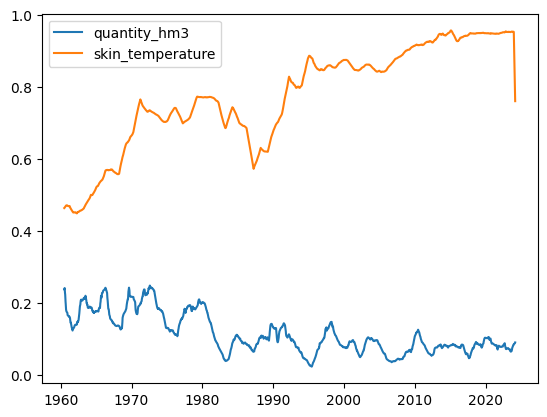

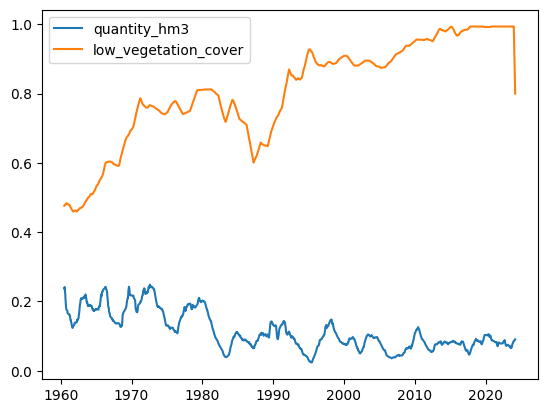

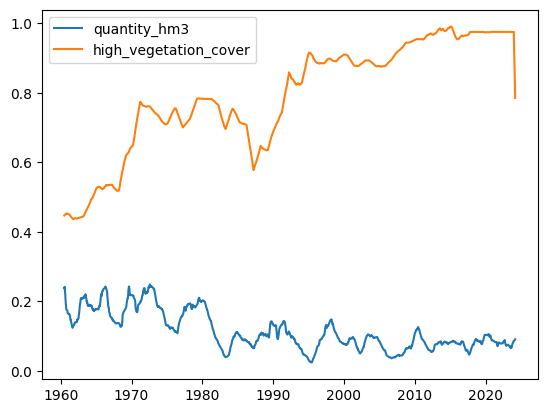

In [34]:
import matplotlib.pyplot as plt

plt.plot(trend_quantity_hm3_riosCanales,label = 'quantity_hm3')
plt.plot(trend_skin_temperature_riosCanales,label = 'skin_temperature')
plt.legend()
plt.show()
plt.plot(trend_quantity_hm3_riosCanales,label = 'quantity_hm3')
plt.plot(trend_low_vegetation_cover,label = 'low_vegetation_cover')
plt.legend()
plt.show()
plt.plot(trend_quantity_hm3_riosCanales,label = 'quantity_hm3')
plt.plot(trend_high_vegetation_cover,label = 'high_vegetation_cover')
plt.legend()
plt.show()

#### Regresión lineal

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy.linalg import cond
from itertools import combinations

df_closest_rios = pd.read_csv('BBDD/df_closest_rios.csv')
df_rios_canales = pd.read_csv('BBDD/df_rios_canales.csv')
df_rios_canales['date'] = pd.to_datetime(df_rios_canales['date'])
df_merge_riosCanales = pd.merge(df_closest_rios[['pixel_copernicus', 'id_station']], df_rios_canales, on='id_station', how = 'inner')
df_merge_riosCanales = df_merge_riosCanales.rename(columns = {'quantity_hm3': 'quantity_hm3_riosCanales'})
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].str.replace(',', '.')
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].fillna(0)
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].astype('float')
df_merge_riosCanales = df_merge_riosCanales[df_merge_riosCanales['date'].dt.year >= 1960]

In [39]:
df_merge_riosCanales

,pixel_copernicus,id_station,date,quantity_hm3_riosCanales
0,13,8036,1988-09-13,0.250560
1,13,8036,1968-10-31,1.607040
2,13,8036,1986-03-14,0.312422
3,13,8036,1982-03-26,0.703296
4,13,8036,2021-11-12,0.195955
...,...,...,...,...
1840871,21,8224,2019-12-08,0.023933
1840872,21,8224,1995-07-12,0.023846
1840873,21,8224,2013-10-06,0.020822
1840874,21,8224,1995-01-01,0.020650


#### Arboles de regresión

In [275]:
X = df_merge_coperRiosCanales[['total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover', 'type_high_vegetation',
       'type_low_vegetation']]
y = df_merge_coperRiosCanales[['quantity_hm3_riosCanales']]

model = DecisionTreeRegressor(random_state=42)  # Ajusta max_depth según sea necesario
model.fit(X, y)

importances = pd.DataFrame({'Variable': ['total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover', 'type_high_vegetation',
       'type_low_vegetation'], 'Importancia': model.feature_importances_})

# Ordenar las variables por importancia
importances = importances.sort_values(by='Importancia', ascending=False)
importances


ERROR! Session/line number was not unique in database. History logging moved to new session 518


,Variable,Importancia
8,soil_water_l4,0.199281
9,high_vegetation_cover,0.155298
6,soil_water_l2,0.132106
7,soil_water_l3,0.127539
1,skin_temperature,0.097498
10,low_vegetation_cover,0.096004
5,soil_water_l1,0.071135
3,runoff,0.030492
0,total_precipitation,0.030446
2,evaporation,0.030252


### Embalses y Ríos canales

In [43]:
df_closest_rios = pd.read_csv('BBDD/df_closest_rios.csv')
df_rios_canales = pd.read_csv('BBDD/df_rios_canales.csv')
df_rios_canales['date'] = pd.to_datetime(df_rios_canales['date'])
df_merge_riosCanales = pd.merge(df_closest_rios[['pixel_copernicus', 'id_station']], df_rios_canales, on='id_station', how = 'inner')
df_merge_riosCanales = df_merge_riosCanales.rename(columns = {'quantity_hm3': 'quantity_hm3_riosCanales'})
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].str.replace(',', '.')
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].fillna(0)
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].astype('float')
df_merge_riosCanales = df_merge_riosCanales[df_merge_riosCanales['date'].dt.year >= 1960]
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])
df_merge_coperRiosCanales = pd.merge(df_merge_riosCanales,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'right')


df_closest_embalses = pd.read_csv('BBDD/df_closest_embalses.csv')
df_embalses_cedex = pd.read_csv('BBDD/df_embalses_cedex.csv')
df_merge_embalses = pd.merge(df_closest_embalses[['pixel_copernicus', 'id_station']], df_embalses_cedex, on='id_station', how = 'inner')
df_merge_embalses = df_merge_embalses.rename(columns = {'quantity_hm3': 'quantity_hm3_embalses'})
df_merge_embalses['date'] = pd.to_datetime(df_merge_embalses['date'])
df_merge_coperEmbalses = pd.merge(df_merge_embalses,df_copernicus, right_on = ['pixel','date'],left_on=['pixel_copernicus','date'], how = 'inner')
df_merge_coperEmbalses['quantity_hm3_embalses'] = df_merge_coperEmbalses['quantity_hm3_embalses'].astype('float')
df_merge_coperEmbalses = df_merge_coperEmbalses[['date','quantity_hm3_embalses','total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover']]
df_merge_coperEmbalses = df_merge_coperEmbalses.groupby('date').sum().reset_index()
df_merge_coperEmbalses = df_merge_coperEmbalses.sort_values('date')

In [81]:
#df rios
df_closest_rios = pd.read_csv('BBDD/df_closest_rios.csv')
df_rios_canales = pd.read_csv('BBDD/df_rios_canales.csv')
df_rios_canales['date'] = pd.to_datetime(df_rios_canales['date'])
df_merge_riosCanales = pd.merge(df_closest_rios[['pixel_copernicus', 'id_station']], df_rios_canales, on='id_station', how = 'inner')
df_merge_riosCanales = df_merge_riosCanales.rename(columns = {'quantity_hm3': 'quantity_hm3_riosCanales'})
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].str.replace(',', '.')
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].fillna(0)
df_merge_riosCanales['quantity_hm3_riosCanales'] = df_merge_riosCanales['quantity_hm3_riosCanales'].astype('float')
df_merge_riosCanales = df_merge_riosCanales[df_merge_riosCanales['date'].dt.year >= 1960]
# df embalses
df_closest_embalses = pd.read_csv('BBDD/df_closest_embalses.csv')
df_embalses_cedex = pd.read_csv('BBDD/df_embalses_cedex.csv')
df_merge_embalses = pd.merge(df_closest_embalses[['pixel_copernicus', 'id_station']], df_embalses_cedex, on='id_station', how = 'inner')
df_merge_embalses = df_merge_embalses.rename(columns = {'quantity_hm3': 'quantity_hm3_embalses'})
df_merge_embalses['date'] = pd.to_datetime(df_merge_embalses['date'])
df_merge_embalses = df_merge_embalses[df_merge_embalses['date'].dt.year >= 1960]
#embalses rios
df_merge_embalses_rios = pd.merge(df_merge_embalses,df_merge_riosCanales, on = ['pixel_copernicus','date'], how = 'outer')
df_merge_embalses_rios = df_merge_embalses_rios[['pixel_copernicus','date','quantity_hm3_embalses','quantity_hm3_riosCanales']]
df_merge_embalses_rios  =df_merge_embalses_rios.fillna(0)
#con copernicus
df_copernicus = pd.read_csv('BBDD/df_copernicus.csv')
df_copernicus['date'] = pd.to_datetime(df_copernicus['date'])

df_merge_rios_embalses = pd.merge(df_copernicus, df_merge_embalses_rios, right_on = ['pixel_copernicus','date'],left_on=['pixel','date'], how = 'left')
df_merge_rios_embalses = df_merge_rios_embalses.fillna(0)
df_merge_rios_embalses = df_merge_rios_embalses[['date', 'total_precipitation',
       'skin_temperature', 'evaporation', 'runoff', 'snowfall',
       'soil_water_l1', 'soil_water_l2', 'soil_water_l3', 'soil_water_l4',
       'high_vegetation_cover', 'low_vegetation_cover', 'type_high_vegetation',
       'type_low_vegetation', 'pixel_copernicus', 'quantity_hm3_embalses',
       'quantity_hm3_riosCanales']]
#df_merge_rios_embalses = df_merge_rios_embalses.set_index('date')

In [103]:
df_merge_embalses_rios['pixel_copernicus'].unique()

array([12, 28,  8,  4, 26, 10, 17, 14, 15, 20, 22, 23, 25, 29, 16, 11,  5,
       13,  6,  3,  9, 27, 21, 18, 24, 19], dtype=int64)

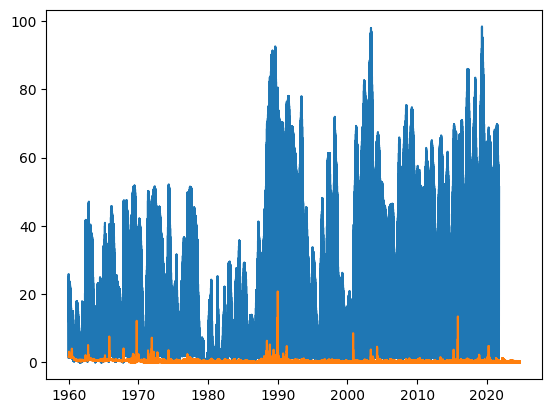

In [111]:
aa = df_merge_embalses_rios[df_merge_embalses_rios['pixel_copernicus'] == 28]
aa = aa.set_index('date')
plt.plot(aa['quantity_hm3_embalses'])
plt.plot(aa['quantity_hm3_riosCanales'])
plt.show()

In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
def regresion(X, y, const=1):
    """
    Perform OLS regression.

    Parameters:
    X : DataFrame or ndarray
        Independent variables.
    y : Series or ndarray
        Dependent variable.
    const : int, optional
        Whether to include a constant (default is 1, include constant).

    Returns:
    results : RegressionResults
        Results of the regression.
    """
    if const == 1:
        X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    return results


In [91]:
df_merge_rios_embalses.corr()

,date,total_precipitation,skin_temperature,evaporation,runoff,snowfall,soil_water_l1,soil_water_l2,soil_water_l3,soil_water_l4,high_vegetation_cover,low_vegetation_cover,type_high_vegetation,type_low_vegetation,pixel_copernicus,quantity_hm3_embalses,quantity_hm3_riosCanales
date,1.000000,-0.001060,0.092975,0.038765,-0.021036,-0.011654,-0.063839,-0.097434,-0.216549,-0.102654,0.061726,0.033523,0.036546,-0.073627,0.137009,-0.040981,-0.189246
total_precipitation,-0.001060,1.000000,-0.080880,-0.111736,0.709628,0.227660,0.251346,0.128872,0.045934,0.042524,0.025917,0.033384,0.012416,-0.016890,0.058085,-0.006436,0.026021
skin_temperature,0.092975,-0.080880,1.000000,-0.311765,-0.047639,-0.159632,-0.532170,-0.508261,-0.377184,-0.222131,-0.163550,-0.110456,-0.052615,0.062243,-0.096721,-0.011058,0.020574
evaporation,0.038765,-0.111736,-0.311765,1.000000,-0.057782,0.051622,0.123956,0.151000,0.125103,0.147209,0.247283,0.163872,0.088918,0.037722,-0.119031,0.044381,0.026379
runoff,-0.021036,0.709628,-0.047639,-0.057782,1.000000,0.072995,0.247879,0.194010,0.135629,0.114284,0.044754,0.074717,0.025738,-0.029806,0.123017,-0.016212,0.017521
snowfall,-0.011654,0.227660,-0.159632,0.051622,0.072995,1.000000,0.105166,0.082209,0.063091,0.047082,0.032716,0.023824,0.010120,-0.018599,0.033760,-0.002811,-0.000934
soil_water_l1,-0.063839,0.251346,-0.532170,0.123956,0.247879,0.105166,1.000000,0.956759,0.801200,0.738720,0.622068,0.476861,0.216030,-0.195950,0.354062,0.066204,0.077021
soil_water_l2,-0.097434,0.128872,-0.508261,0.151000,0.194010,0.082209,0.956759,1.000000,0.884247,0.783886,0.634559,0.510562,0.229708,-0.143663,0.341035,0.064935,0.077338
soil_water_l3,-0.216549,0.045934,-0.377184,0.125103,0.135629,0.063091,0.801200,0.884247,1.000000,0.872731,0.634824,0.532403,0.237894,-0.123177,0.372802,0.065705,0.096090
soil_water_l4,-0.102654,0.042524,-0.222131,0.147209,0.114284,0.047082,0.738720,0.783886,0.872731,1.000000,0.732391,0.594436,0.267080,-0.202016,0.459318,0.080831,0.085835


In [98]:
regresion(X = df_merge_rios_embalses[[ 'quantity_hm3_riosCanales','soil_water_l1']], y = df_merge_rios_embalses['quantity_hm3_embalses'], const=1).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     quantity_hm3_embalses   R-squared:                       0.008
Model:                               OLS   Adj. R-squared:                  0.008
Method:                    Least Squares   F-statistic:                     8335.
Date:                   Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                           17:38:18   Log-Likelihood:            -1.2144e+07
No. Observations:                2146031   AIC:                         2.429e+07
Df Residuals:                    2146028   BIC:                         2.429e+07
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.0491      0.106     94.663      0.000       9.841      10.257
quantity_hm3_riosCanales     5.3668      0.063     84.794      0.000       5.243       5.491
soil_water_l1                5.4229      0.060     90.541      0.000       5.305       5.540
==============================================================================
Omnibus:                  2805533.810   Durbin-Watson:                   0.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        507864253.498
Skew:                           7.496   Prob(JB):                         0.00
Kurtosis:                      76.857   Cond. No.                         5.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""